<a href="https://colab.research.google.com/github/rozhinmkian/Ising-Model/blob/main/2D%20Ising%20Model%20Finite%20Scale%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crtitical phenomenon - Finite Size Analysis
## Rozhin Mohammadikian 401416059



### Setting up space

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.constants import k as kc
from tqdm import tqdm
from scipy.stats import linregress


def Energy(lattice,J):
    e = 0
    n = len(lattice)
    lattice=np.array(lattice)
    for i in range(n):
        for j in range(n):
            x= n-i-1
            y= n-j-1
            """to calculate each interaction once, each spin is computed with its top and left neighbor"""
            e += -J*lattice[x,y]*(lattice[x,y-1] + lattice[x-1,y])
    return e



#grid=[[1,-1,-1],[1,-1,1],[-1,1,1]]
#Energy(grid,1)

## Part A

### Simulation

In [ ]:
chain_L = [32, 64, 128]
en = 25 # number of ensembles to average over
k=1
J = 1
T_arr = np.linspace(0.01,5,50) #Temperature array

#making array of T with two different point densities
#so that there are more points around critical T (~2.3)
T1= np.linspace(0.01, 2, 10)
T2= np.linspace(2.2,2.8,30)
T3= np.linspace(3,5,10)
T_arr= np.concatenate((T1,T2,T3))

B_arr = 1/(k*T_arr) #beta array


#final results will be stored here
data = np.zeros((len(chain_L),len(T_arr),4)) #4 is for storing energy average and magnetization and their squares for each T and for each chain length and Cv and X

###########################################################
#initializing grid with all spins up
#cause the first T is close to zero(completely ordered state)
#in each iteration over T, the initial grid will be the final grid of the previous T
#which makes sense as we are decreasing order of the spins
for t_iter,n in enumerate(chain_L):
  spin_iter = n/8 #average number that each spin is randomly iterated over

  grid=np.ones((n,n))
  steps = spin_iter*(n**2)    #number of Monte Carlo iterations

  """for each T"""
  for t in tqdm(range(len(T_arr))):
      T = T_arr[t]
      B = B_arr[t]
      enenergy = 0 #stores sum of energies
      enspin = 0 #stores sum of spins
      enenergy2 = 0 #stores sum of energy squares for Cv calculation
      enspin2  = 0 #stores sum of spin squares for X calculation

      """for each ensemble"""
      for e in range(en):

          #0: defining lattice and calculating initial energy and spins
          energy = Energy(grid,J)
          spin = np.sum(grid)


          """for each MC step"""
          for m in range(int(steps)):

              #1: choose random point on lattice
              i = np.random.randint(n)
              j = np.random.randint(n)

              #2: calculate dE if the spin is flipped, using only neighboring spins of the selected spin
              E1 = -J*grid[i,j]*(grid[i,j-1] + grid[i-1,j] + grid[(i+1)%n,j] + grid[i,(j+1)%n]) #energy of the site before flip
              dE = -2*E1

              #3: decide whether the flip should be accepted
              if dE<0 or np.random.random() < np.exp(-B*dE):
                  grid[i,j] = -grid[i,j]
                  energy += dE
                  spin += 2*grid[i,j]

          enenergy += energy
          enspin += spin
          enenergy2 += energy**2
          enspin2 += spin**2


      data[t_iter,t,0] = enenergy/n**2/en #energy results
      data[t_iter,t,1] = enenergy2/n**2/en #energy^2 results
      data[t_iter,t,2] = enspin/n**2/en #magnetization result
      data[t_iter,t,3] = enspin2/n**2/en  #magnetization result


100%|██████████| 50/50 [42:56<00:00, 51.54s/it]


In [ ]:
#raw_data = data
L = np.vstack((np.ones(50)*32, np.ones(50)*64, np.ones(50)*128))

In [ ]:
#data = raw_data
data[:,:,1] *= L**4
data[:,:,3] *= L**4
data[:,:,0] *= L**2
data[:,:,2] *= L**2

Text(0.5, 0.98, '2D Ising Model simulation')

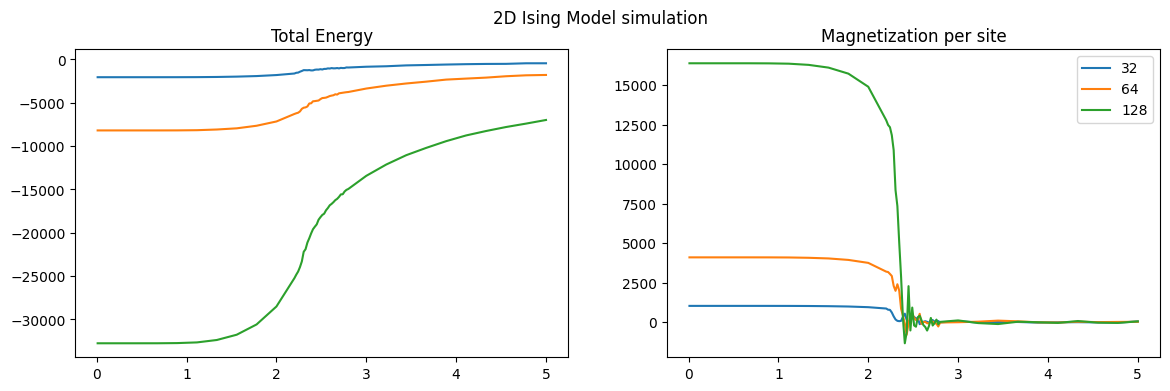

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title('Total Energy')
ax[0].plot(T_arr,data[0,:,0], label='32')
ax[0].plot(T_arr,data[1,:,0], label='64')
ax[0].plot(T_arr,data[2,:,0], label='128')
ax[1].set_title('Magnetization per site')
ax[1].plot(T_arr,data[0,:,2], label='32')
ax[1].plot(T_arr,data[1,:,2], label='64')
ax[1].plot(T_arr,data[2,:,2], label='128')
plt.legend()
plt.suptitle('2D Ising Model simulation')

In [ ]:
Beta = np.vstack((B_arr, B_arr,B_arr))
#Beta

Text(0.5, 0.98, '2D Ising Model simulation')

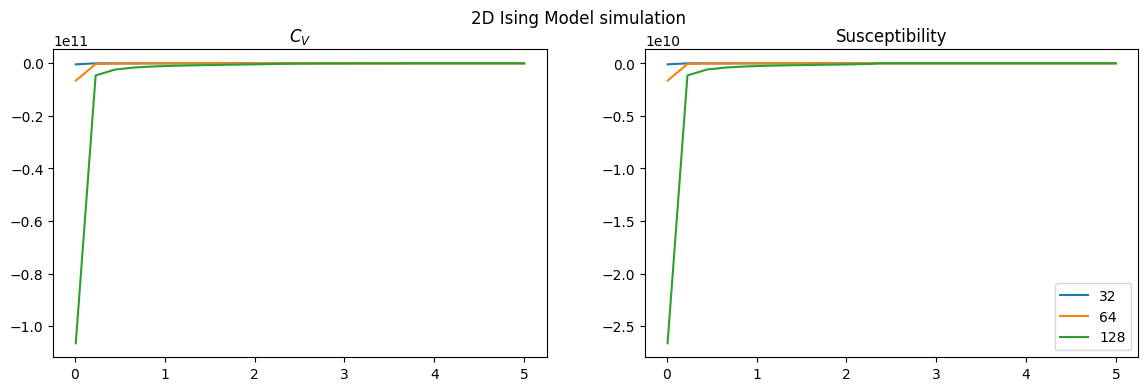

In [ ]:
Cv = (data[:,:,1] - data[:,:,0]**2)*B_arr
X = (data[:,:,3] - data[:,:,2]**2)*B_arr

fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title('$C_{V}$')
ax[0].plot(T_arr,Cv[0,:], label='32')
ax[0].plot(T_arr,Cv[1,:], label='64')
ax[0].plot(T_arr,Cv[2,:], label='128')
ax[1].set_title('Susceptibility')
ax[1].plot(T_arr,X[0,:], label='32')
ax[1].plot(T_arr,X[1,:], label='64')
ax[1].plot(T_arr,X[2,:], label='128')
plt.legend()
plt.suptitle('2D Ising Model simulation')

In [ ]:
#finding the peaks of Cv and X and finding then slope of the log-log plot using linear regression
Cv_max = []
X_max = []
for i in range(len(chain_L)):
  Cv_max.append(max(Cv[i,:]))
  X_max.append(max(X[i,:]))

log_L = np.log(chain_L)
log_Cv_max = np.log(Cv_max)
log_X_max = np.log(X_max)

Cv_res = linregress(log_L, log_Cv_max)
X_res = linregress(log_L, log_X_max)

Cv_slope = Cv_res.slope
Cv_intercept = Cv_res.intercept
X_slope = X_res.slope
X_intercept = X_res.intercept

print('Cv slope is: ', round(Cv_slope,3), '\nX slope is: ', round(X_slope,3))

Cv slope is:  nan 
X slope is:  1.788


<ipython-input-29-9b860d2d08eb>:9: RuntimeWarning: invalid value encountered in log
  log_Cv_max = np.log(Cv_max)


In [ ]:
Cv_max

[-37442.940480000005, -629353.322, -9686526.75868]

(0.0, 7.106176418079056)

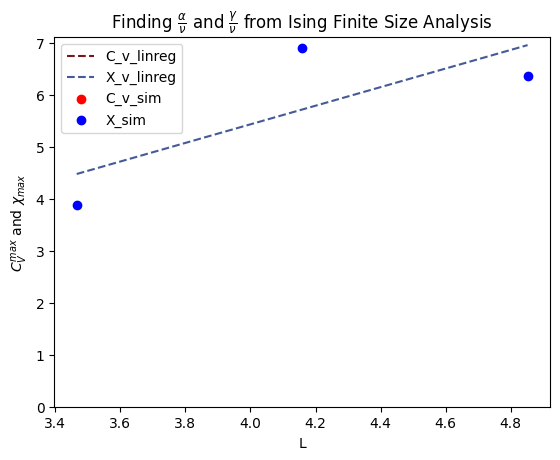

In [ ]:
plt.plot(log_L, log_L*Cv_slope + Cv_intercept, linestyle='dashed', color='#76181a', label='C_v_linreg')
plt.plot(log_L, log_L*X_slope + X_intercept, linestyle='dashed', color='#445a99', label='X_v_linreg')
plt.scatter(log_L, log_Cv_max, label='C_v_sim', color='r')
plt.scatter(log_L, log_X_max, label='X_sim', color='b')
#plt.text(3.6,34,r'$\frac{\alpha}{\nu}$='+str(round(Cv_slope,2)))
#plt.text(3.6,7,r'$\frac{\gamma}{\nu}$='+str(round(X_slope,2)))
plt.title(r'Finding $\frac{\alpha}{\nu}$ and $\frac{\gamma}{\nu}$ from Ising Finite Size Analysis')
plt.xlabel('L')
plt.ylabel(r'$C_{V}^{max}$ and $\chi_{max}$')
plt.legend()
plt.ylim(bottom=0)
